# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [2]:
# Code Here
penguins.head()
penguins = penguins.dropna()

#do we need to make models for each?


In [3]:
X = penguins.drop(columns='species')
y = penguins['species']

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)



In [4]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier  # Use KNN for classification, not regression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, roc_curve, auc, RocCurveDisplay)

# Create the ColumnTransformer for preprocessing
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

# Create the pipeline with KNN classifier
knn_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ]
)


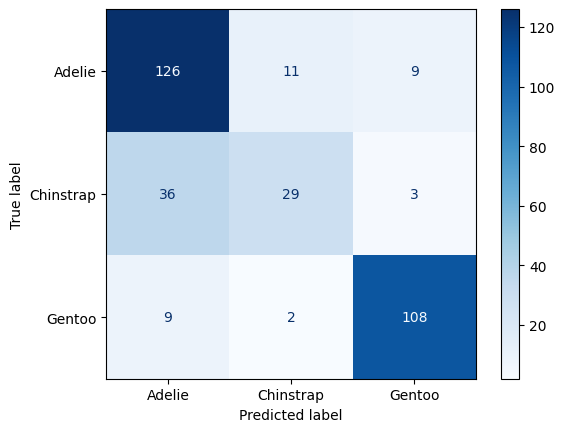

In [5]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay)

# Create the ColumnTransformer for preprocessing
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        #("standardize", StandardScaler(),
    ],
    remainder="passthrough"
)

# Create the pipeline with KNN classifier
knn_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ]
)

# Perform cross-validated predictions
y_pred_cv = cross_val_predict(knn_pipeline, X, y, cv=5)

# Print confusion matrix and classification report
cm = confusion_matrix(y, y_pred_cv)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')

How to Read It SOURCE(GEMINI)

Diagonal Elements: These represent the correct predictions. For example, the value 144 in the top-left cell indicates that 144 Adelie penguins were correctly classified as Adelie.

Off-Diagonal Elements: These represent incorrect predictions. For example, the value 0 in the top-right cell means that no Adelie penguin was incorrectly classified as a Gentoo.

Overall Performance:

In this case, the model has performed very well, with most predictions being correct. The model is particularly good at classifying Gentoo penguins.

Potential Issues:

While the overall performance is high, it's worth noting that the model seems to have some difficulty distinguishing between Adelie and Chinstrap penguins. There are 2 instances where Adelie penguins were incorrectly classified as Chinstrap.

Possible Improvements:

Feature Engineering: Consider adding or modifying features that could better differentiate between Adelie and Chinstrap penguins.
Model Selection: Try different classification algorithms to see if they can improve performance.
Hyperparameter Tuning: Experiment with different hyperparameters of the current model to optimize its performance.
By understanding the confusion matrix, you can gain valuable insights into your model's strengths and weaknesses, and take steps to improve its performance.

In [6]:
cv_accuracy = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')
cv_accuracy.mean()

0.7902306648575306

In [15]:
from sklearn.metrics import classification_report, roc_curve, auc

# Calculate classification report for each species
print(classification_report(y, y_pred_cv, target_names=['Adelie', 'Chinstrap', 'Gentoo']))

knn_pipeline.fit(X, y)

# Now you can make predictions
y_pred = knn_pipeline.predict(X)

# If you want to get AUC, you will need to use predict_proba instead
from sklearn.metrics import roc_auc_score
y_pred_prob = knn_pipeline.predict_proba(X)

# Calculate AUC (use label_binarize if needed for multi-class)
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y, classes=np.unique(y))
y_pred_prob = knn_pipeline.predict_proba(X)
#y_bin = label_binarize(y, classes=['Adelie', 'Chinstrap', 'Gentoo'])
#auc_score = roc_auc_score(y_bin, y_pred_prob, average='macro', multi_class='ovr')
#auc_score
for i, species_name in enumerate(np.unique(y)):
    print(f"AUC score for {species_name}: {roc_auc_score(y_bin[:, i], y_pred_prob[:, i])}")



# Get predicted probabilities (instead of hard predictions)
#y_pred_prob = knn_pipeline.predict_proba(X)  # replace model with your trained model

# Calculate the AUC for each class and get the macro average

#auc_score = roc_auc_score(y_bin, y_pred_prob, average='macro', multi_class='ovr')

# Calculate ROC curve and AUC for each species
#fpr, tpr, _ = roc_curve(y, y_pred_cv[:, 0], pos_label='Adelie')  # For Adelie
#roc_auc = auc(fpr, tpr)
#print('AUC for Adelie:', roc_auc)

# Similarly, calculate for Chinstrap and Gentoo

#AUC and ROC is what we are missing

              precision    recall  f1-score   support

      Adelie       0.74      0.86      0.79       146
   Chinstrap       0.69      0.43      0.53        68
      Gentoo       0.90      0.91      0.90       119

    accuracy                           0.79       333
   macro avg       0.78      0.73      0.74       333
weighted avg       0.79      0.79      0.78       333

AUC score for Adelie: 0.954050985275804
AUC score for Chinstrap: 0.9468091009988902
AUC score for Gentoo: 0.9937171130134297


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [8]:
# Code Here
knn_pipeline = Pipeline(
    [
        ("preprocessing", ct),  # Use the same preprocessing steps as before
        ("knn", KNeighborsClassifier(n_neighbors=5))  # Replace with your desired K value
    ]
)

In [17]:
knn_pipeline2 = Pipeline(
    [
        ("preprocessing", ct),
        ("knn", KNeighborsClassifier(n_neighbors=10))  # Replace with your desired K value
    ]
)

knn_pipeline2.fit(X, y)

# Now you can make predictions
y_pred = knn_pipeline2.predict(X)

# If you want to get AUC, you will need to use predict_proba instead
from sklearn.metrics import roc_auc_score
y_pred_prob = knn_pipeline2.predict_proba(X)

# Calculate AUC (use label_binarize if needed for multi-class)
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y, classes=np.unique(y))
y_pred_prob = knn_pipeline2.predict_proba(X)
#y_bin = label_binarize(y, classes=['Adelie', 'Chinstrap', 'Gentoo'])
#auc_score = roc_auc_score(y_bin, y_pred_prob, average='macro', multi_class='ovr')
#auc_score
for i, species_name in enumerate(np.unique(y)):
    print(f"AUC score for {species_name}: {roc_auc_score(y_bin[:, i], y_pred_prob[:, i])}")

AUC score for Adelie: 0.918687275657461
AUC score for Chinstrap: 0.8973917869034407
AUC score for Gentoo: 0.9912824943061337


In [20]:
from sklearn.tree import DecisionTreeClassifier
tree_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("tree", DecisionTreeClassifier(max_depth =5))
    ]
)

tree_pipeline.fit(X, y)

# Now you can make predictions
y_pred = tree_pipeline.predict(X)

# If you want to get AUC, you will need to use predict_proba instead
from sklearn.metrics import roc_auc_score
y_pred_prob = tree_pipeline.predict_proba(X)

# Calculate AUC (use label_binarize if needed for multi-class)
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y, classes=np.unique(y))
y_pred_prob = tree_pipeline.predict_proba(X)
#y_bin = label_binarize(y, classes=['Adelie', 'Chinstrap', 'Gentoo'])
#auc_score = roc_auc_score(y_bin, y_pred_prob, average='macro', multi_class='ovr')
#auc_score
for i, species_name in enumerate(np.unique(y)):
    print(f"AUC score for {species_name}: {roc_auc_score(y_bin[:, i], y_pred_prob[:, i])}")

AUC score for Adelie: 1.0
AUC score for Chinstrap: 1.0
AUC score for Gentoo: 1.0


In [22]:
tree_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("tree", DecisionTreeClassifier(max_depth = 10))
    ]
)

tree_pipeline.fit(X, y)

# Now you can make predictions
y_pred = tree_pipeline.predict(X)

# If you want to get AUC, you will need to use predict_proba instead
from sklearn.metrics import roc_auc_score
y_pred_prob = tree_pipeline.predict_proba(X)

# Calculate AUC (use label_binarize if needed for multi-class)
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y, classes=np.unique(y))
y_pred_prob = tree_pipeline.predict_proba(X)
#y_bin = label_binarize(y, classes=['Adelie', 'Chinstrap', 'Gentoo'])
#auc_score = roc_auc_score(y_bin, y_pred_prob, average='macro', multi_class='ovr')
#auc_score
for i, species_name in enumerate(np.unique(y)):
    print(f"AUC score for {species_name}: {roc_auc_score(y_bin[:, i], y_pred_prob[:, i])}")

AUC score for Adelie: 1.0
AUC score for Chinstrap: 1.0
AUC score for Gentoo: 1.0
